In [20]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from src.d01_data.load_data import items,holidays,oil,stores,transactions

### Items

In [21]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


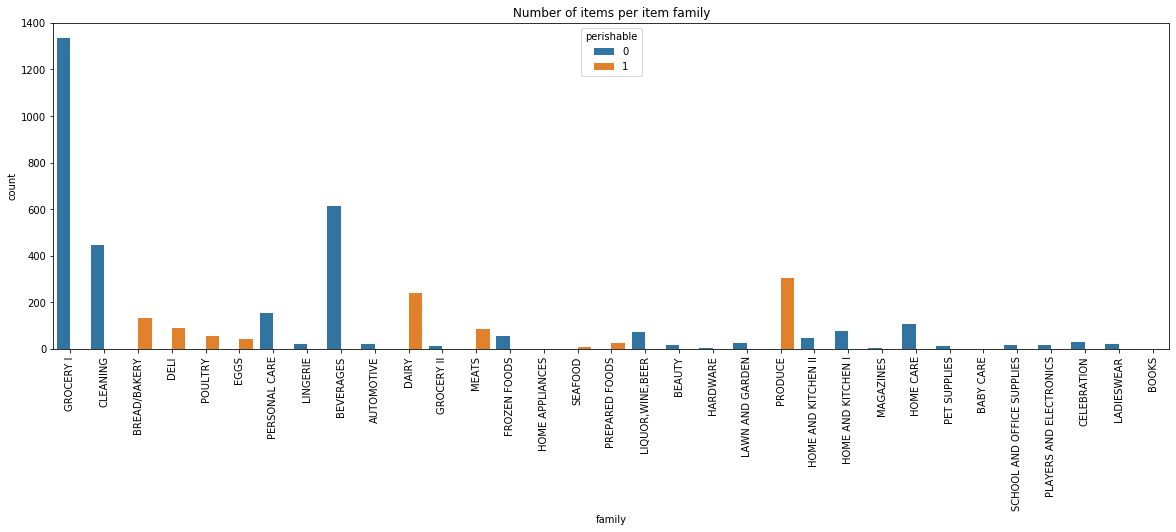

In [8]:
plt.figure(figsize=(20,6))
sns.countplot(x='family',data = items,hue = 'perishable')
plt.xticks(rotation=90)
plt.title("Number of items per item family")
plt.show()

### Holidays

In [10]:
holidays_2013 = holidays.query("date >= '2013-01-01' and date <= '2013-12-31'")

In [11]:
holidays_2013.head()

,date,type,locale,locale_name,description,transferred
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False
45,2013-02-12,Holiday,National,Ecuador,Carnaval,False


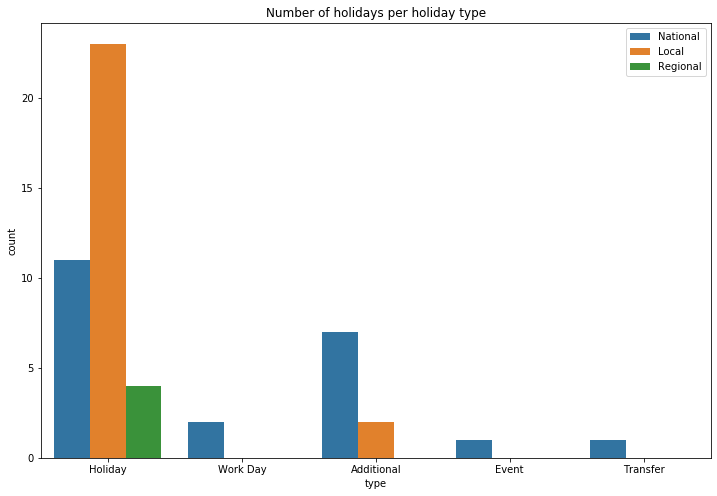

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='type', data=holidays_2013,hue='locale')
plt.title("Number of holidays per holiday type")
plt.legend(loc='upper right')

### Oil Price

In [5]:
oil_tmp = oil
oil_tmp['date'] = oil_tmp['date'].map(lambda x: datetime.strptime(x,'%Y-%m-%d'))

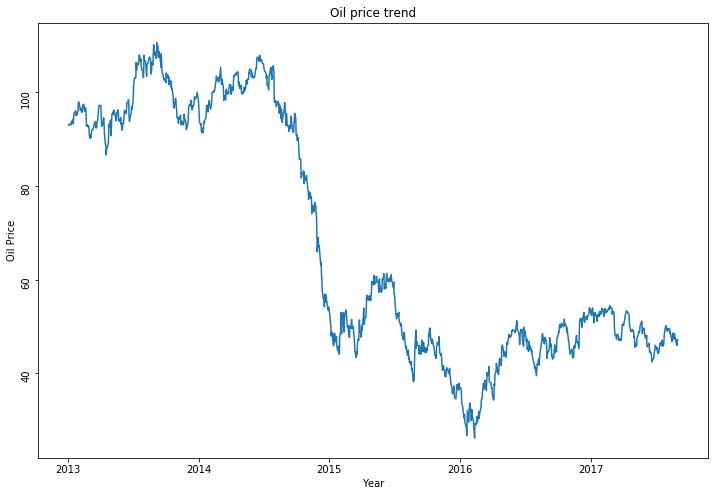

In [6]:
plt.figure(figsize=(12,8))
sns.lineplot(x='date',y='dcoilwtico',data=oil_tmp)
plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.title("Oil price trend")
plt.yticks(rotation=90)
del(oil_tmp)

### Stores

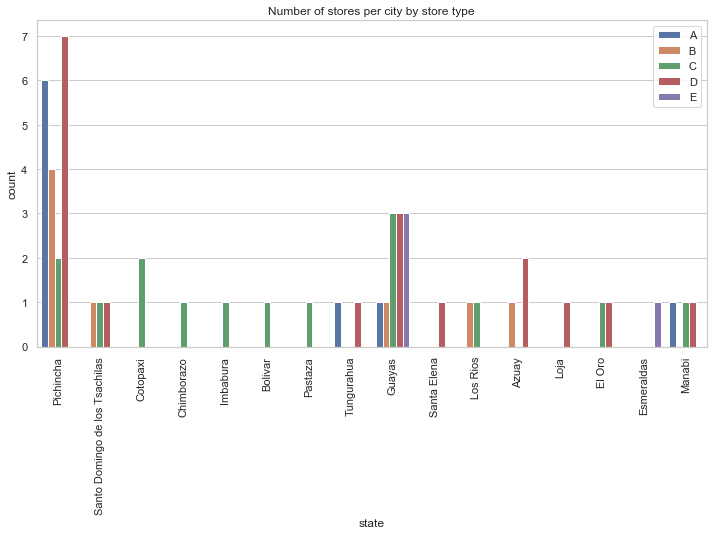

In [46]:
plt.figure(figsize=(12,6))
sns.set(style='whitegrid')
sns.countplot(x='state',data=stores, hue = 'type', hue_order=['A','B','C','D','E'])
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title("Number of stores per city by store type")
plt.show()

### Transactions

In [7]:
transactions_tmp = transactions
transactions_tmp['date'] = transactions_tmp['date'].map(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [8]:
transactions_tmp['year'] = transactions_tmp['date'].map(lambda x: x.year)
transactions_tmp['month'] = transactions_tmp['date'].map(lambda x: x.month)
transactions_tmp['day'] = transactions_tmp['date'].map(lambda x: x.day)
transactions_tmp['weekday_name'] = transactions_tmp['date'].map(lambda x: x.strftime('%A'))

In [13]:
transactions_tmp.head()

,date,store_nbr,transactions,year,month,day,weekday_name
0,2013-01-01,25,770,2013,1,1,Tuesday
1,2013-01-02,1,2111,2013,1,2,Wednesday
2,2013-01-02,2,2358,2013,1,2,Wednesday
3,2013-01-02,3,3487,2013,1,2,Wednesday
4,2013-01-02,4,1922,2013,1,2,Wednesday


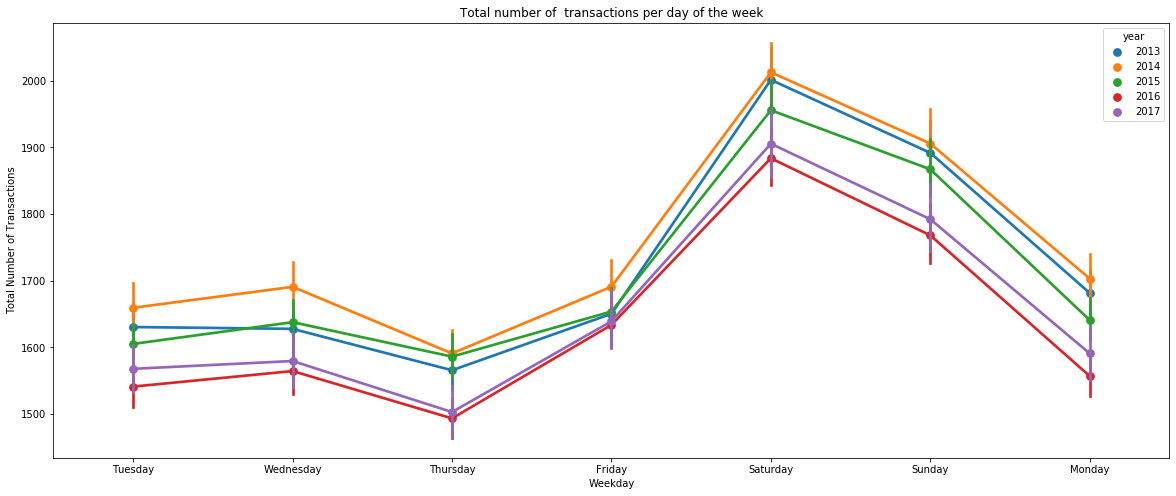

In [17]:
plt.figure(figsize=(20,8))
sns.pointplot(x='weekday_name',y='transactions',data=transactions_tmp,hue='year')
plt.xlabel('Weekday')
plt.title("Total number of transactions per day of the week")
plt.ylabel('Total Number of Transactions')
plt.show()

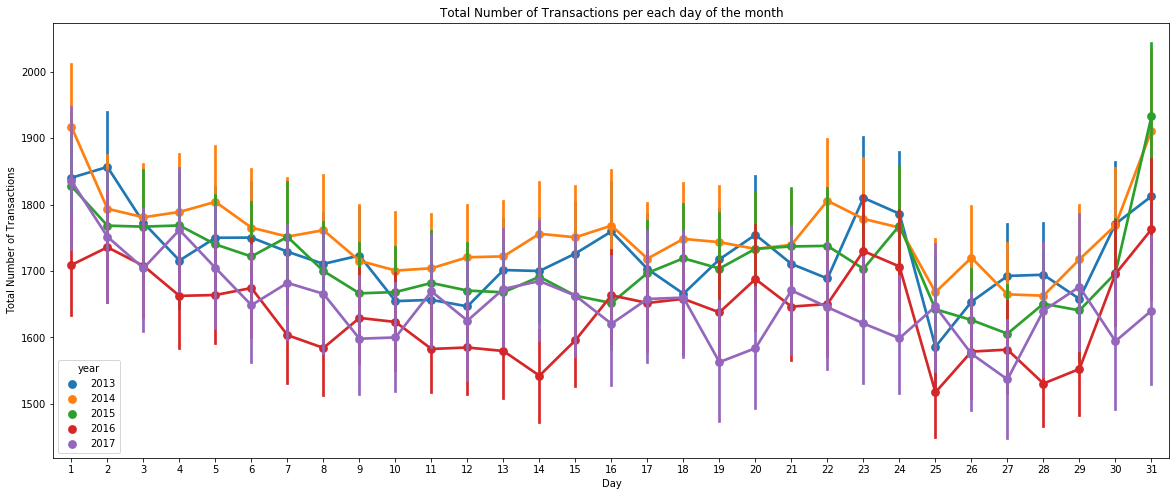

In [18]:
plt.figure(figsize=(20,8))
sns.pointplot(x='day',y='transactions',data=transactions_tmp,hue='year')
plt.xlabel('Day')
plt.ylabel('Total Number of Transactions')
plt.title('Total Number of Transactions per each day of the month')
plt.show()

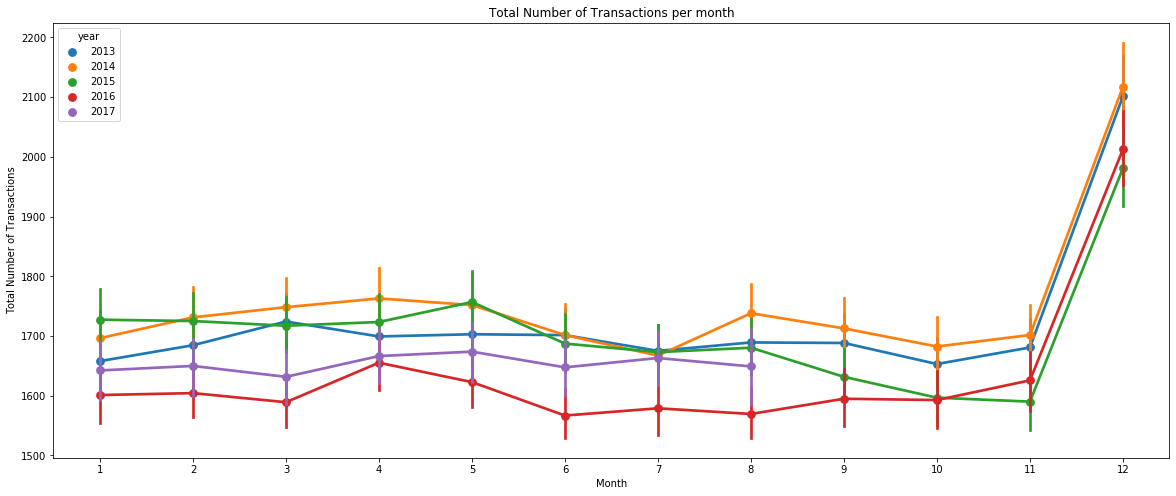

In [19]:
plt.figure(figsize=(20,8))
sns.pointplot(x='month',y='transactions',data=transactions_tmp,hue='year')
plt.xlabel('Month')
plt.ylabel('Total Number of Transactions')
plt.title('Total Number of Transactions per month')
plt.show()